In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/Users/affan/Projects/hortikultura-dss/notebook'

In [3]:
os.chdir("./hortikultura-dss")

FileNotFoundError: [Errno 2] No such file or directory: './hortikultura-dss'

In [4]:
os.getcwd()

'/Users/affan/Projects/hortikultura-dss/notebook'

In [ ]:
df = pd.read_csv("./data/all_rank.csv")
df.head()

,Unnamed: 0,kota,jenis_tanaman,pm_score,rank
0,0,Kota Uneng,Bayam,6.163795,1
1,1,Kota Uneng,Sawi,5.966614,2
2,2,Kota Uneng,Terung,5.586018,3
3,3,Kota Uneng,Kangkung,5.502105,4
4,4,Kota Uneng,Bawang Merah,5.478115,5


In [ ]:
df.iloc[:, 1:]

,kota,jenis_tanaman,pm_score,rank
0,Kota Uneng,Bayam,6.163795,1
1,Kota Uneng,Sawi,5.966614,2
2,Kota Uneng,Terung,5.586018,3
3,Kota Uneng,Kangkung,5.502105,4
4,Kota Uneng,Bawang Merah,5.478115,5
...,...,...,...,...
457,Wairbeler,Cabai Rawit,5.605238,10
458,Wairbeler,Cabai Merah,5.550899,11
459,Wairbeler,Kacang Panjang,5.415939,12
460,Wairbeler,Kentang,5.250849,13


In [ ]:
df.iloc[:, 1:].groupby("kota")

In [ ]:
df_group = df.iloc[:, 1:].groupby("kota")
df_group[df_group['rank'] <= 3]

TypeError: '<=' not supported between instances of 'SeriesGroupBy' and 'int'

In [ ]:
df_group['rank']

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
y_true = [4, 5, 11]
y_pred = [11, 5, 4]
labels = ["cabai merah", "cabai rawit", "terung"]

In [49]:
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

 cabai merah       0.00      0.00      0.00         1
 cabai rawit       1.00      1.00      1.00         1
      terung       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



In [52]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [69]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, average="weighted")

0.3333333333333333

/var/folders/4w/rtqyy6vs1lj9kwm2vwrbblt40000gn/T/ipykernel_72693/1599386075.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


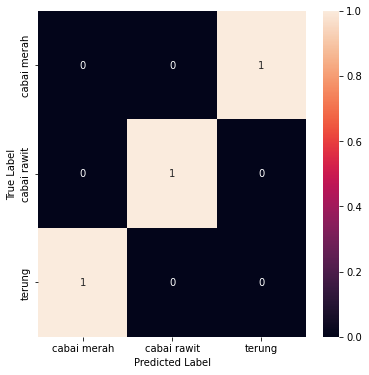

In [63]:
import seaborn as sns

# plt.figure(figsize=(8,6))
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.show()

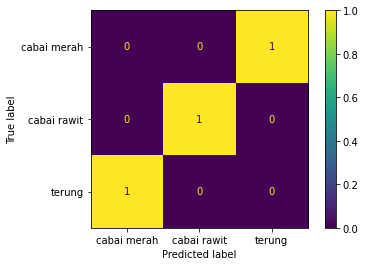

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=labels).plot()

In [40]:
y_predict = ["Bayam","Sawi","Bawang Merah","Kangkung","Terung","Buncis","Brokoli","Kubis","Cabai Merah","Cabai Rawit","Tomat","Wortel","Kentang","Kacang Panjang"]
y_true = ["cabai merah", "brokoli", "sawi"]

In [41]:
l2i = {v: k for k, v in enumerate(y_predict)}
i2l = {k: v for k, v in enumerate(y_predict)}

In [42]:
l2i

{'Bayam': 0,
 'Sawi': 1,
 'Bawang Merah': 2,
 'Kangkung': 3,
 'Terung': 4,
 'Buncis': 5,
 'Brokoli': 6,
 'Kubis': 7,
 'Cabai Merah': 8,
 'Cabai Rawit': 9,
 'Tomat': 10,
 'Wortel': 11,
 'Kentang': 12,
 'Kacang Panjang': 13}

In [34]:
y_predict = [i.lower() for i in y_predict if i.lower() in y_true]

In [35]:
y_true, y_predict

(['cabai merah', 'brokoli', 'sawi'], ['sawi', 'brokoli', 'cabai merah'])

In [36]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

     brokoli       1.00      1.00      1.00         1
 cabai merah       0.00      0.00      0.00         1
        sawi       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



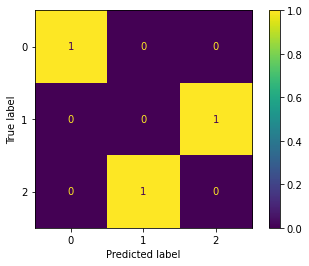

In [37]:
d = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_predict))
d.plot()

In [13]:
y_predict = ["Bayam","Sawi","Bawang Merah","Kangkung","Terung","Buncis","Brokoli","Kubis","Cabai Merah","Cabai Rawit","Tomat","Wortel","Kentang","Kacang Panjang"]
y_predict = [i.lower() for i in y_predict][:7]
y_true = ["cabai merah", "cabai rawit", "tomat", "wortel", "buncis", "sawi", "kacang panjang"]

y_predict = y_predict[:3]
y_true = y_true[:3]

print(y_predict)
print(y_true)

confusion_matrix(y_true, y_predict)

['bayam', 'sawi', 'bawang merah']
['cabai merah', 'cabai rawit', 'tomat']


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [9]:
print(classification_report(y_true, y_predict))

                precision    recall  f1-score   support

  Bawang Merah       0.00      0.00      0.00         1
         Bayam       0.00      0.00      0.00         1
       Brokoli       0.00      0.00      0.00         1
        Buncis       0.00      0.00      0.00         1
   Cabai Merah       0.00      0.00      0.00         1
   Cabai Rawit       0.00      0.00      0.00         1
Kacang Panjang       1.00      1.00      1.00         1
      Kangkung       0.00      0.00      0.00         1
       Kentang       1.00      1.00      1.00         1
         Kubis       0.00      0.00      0.00         1
          Sawi       0.00      0.00      0.00         1
        Terung       0.00      0.00      0.00         1
         Tomat       0.00      0.00      0.00         1
        Wortel       1.00      1.00      1.00         1

      accuracy                           0.21        14
     macro avg       0.21      0.21      0.21        14
  weighted avg       0.21      0.21      0.21 

In [ ]:
confusion_matrix(y_true, y_predict)

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
from skelarn.metrics import classification_report

ModuleNotFoundError: No module named 'skelarn'

In [4]:
from sklearn.metrics import classification_report

In [7]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

Bawang Merah       0.00      0.00      0.00         1
       Bayam       0.00      0.00      0.00         0
 Cabai Merah       0.00      0.00      0.00         1
        Sawi       0.00      0.00      0.00         0
      Terung       1.00      1.00      1.00         1

    accuracy                           0.33         3
   macro avg       0.20      0.20      0.20         3
weighted avg       0.33      0.33      0.33         3



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_clas

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_true, y_predict))
print(f1_score(y_true, y_predict))
print(precision_score(y_true, y_predict))
print(recall_score(y_true, y_predict))

0.3333333333333333


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_true, y_predict))
# print(f1_score(y_true, y_predict))
print(precision_score(y_true, y_predict))
print(recall_score(y_true, y_predict))

0.3333333333333333


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
labels = ["Bayam","Sawi","Bawang Merah","Kangkung","Terung","Buncis","Brokoli","Kubis","Cabai Merah","Cabai Rawit","Tomat","Wortel","Kentang","Kacang Panjang"]
l2i = {v: k for k, v in enumerate(labels)}
l2i

{'Bayam': 0,
 'Sawi': 1,
 'Bawang Merah': 2,
 'Kangkung': 3,
 'Terung': 4,
 'Buncis': 5,
 'Brokoli': 6,
 'Kubis': 7,
 'Cabai Merah': 8,
 'Cabai Rawit': 9,
 'Tomat': 10,
 'Wortel': 11,
 'Kentang': 12,
 'Kacang Panjang': 13}

In [ ]:
i2l = {k: v for k, v in enumerate(labels)}
i2l

{0: 'Bayam',
 1: 'Sawi',
 2: 'Bawang Merah',
 3: 'Kangkung',
 4: 'Terung',
 5: 'Buncis',
 6: 'Brokoli',
 7: 'Kubis',
 8: 'Cabai Merah',
 9: 'Cabai Rawit',
 10: 'Tomat',
 11: 'Wortel',
 12: 'Kentang',
 13: 'Kacang Panjang'}

In [ ]:
y_predict

['Bayam', 'Sawi', 'Terung']

In [ ]:
y_predict_ = [l2i[i] for i in y_predict]
y_true_ = [l2i[i] for i in y_true]

y_predict_, y_true_

([0, 1, 4], [2, 8, 4])

In [ ]:
confusion_matrix(y_true_, y_predict_)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

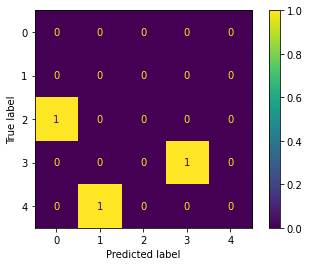

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true_, y_predict_)).plot()